# Exploratory Data Analysis: Cats vs Dogs

**Group ID:** 25

| Name | ID | Contribution |
| :--- | :--- | :--- |
| Prasath J | 2024AA05323 | 100% |
| Vishwanath Rajakumar | 2024AA05309 | 100% |
| Adi Sathwik | 2024AB05213 | 100% |
| Jagadi Shruti Chanabasappa | 2024AA05181 | 100% |
| Kannan S | 2024AA05035 | 100% |

---

This notebook performs basic Exploratory Data Analysis (EDA) on the Kaggle Cats vs Dogs classification dataset.

In [1]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import numpy as np

## 1. Class Distribution
Let's check how many images we have for each class (Cats vs Dogs).

Class Distribution: {'cats': 9999, 'dogs': 9999}


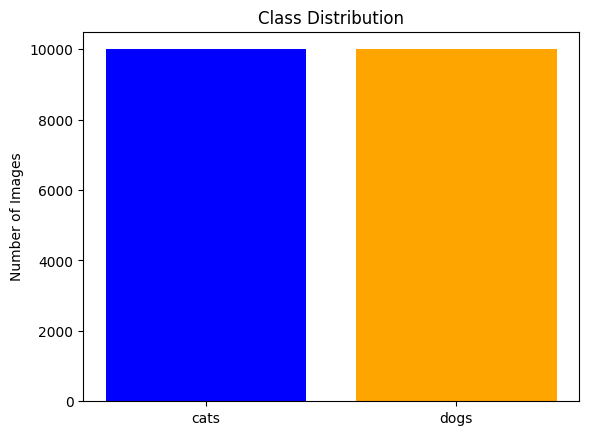

In [2]:
data_dir = '../data/processed/train'
classes = ['cats', 'dogs']
class_counts = {}

for cls in classes:
    path = os.path.join(data_dir, cls)
    if os.path.exists(path):
        class_counts[cls] = len(glob.glob(os.path.join(path, '*.*')))
    else:
        class_counts[cls] = 0

print("Class Distribution:", class_counts)

plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'orange'])
plt.title('Class Distribution')
plt.ylabel('Number of Images')
plt.show()

## 2. Visualizing Samples
Let's look at some sample images from the dataset.

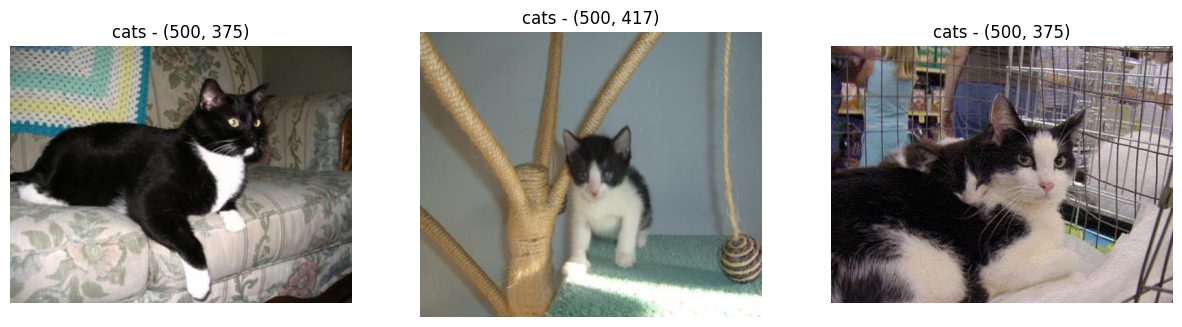

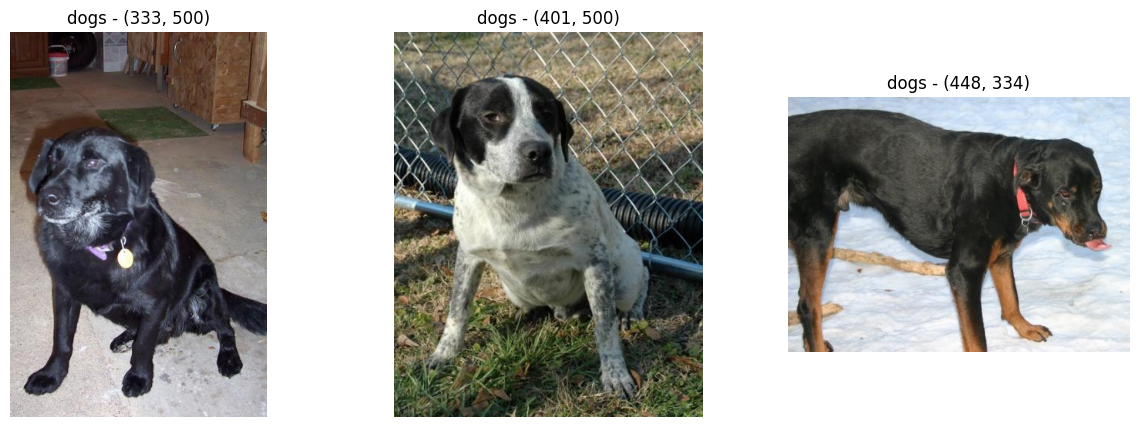

In [3]:
def show_samples(cls, num_samples=3):
    path = os.path.join(data_dir, cls)
    if not os.path.exists(path):
        print(f"Directory not found: {path}")
        return
        
    files = glob.glob(os.path.join(path, '*.*'))
    if not files:
        print(f"No images found in {path}")
        return

    plt.figure(figsize=(15, 5))
    for i, file in enumerate(files[:num_samples]):
        img = Image.open(file)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"{cls} - {img.size}")
        plt.axis('off')
    plt.show()

show_samples('cats')
show_samples('dogs')

## 3. Image Size Analysis
Images from the web often vary in size. Let's inspect the dimensions to motivate our resize transformation (224x224).

/opt/homebrew/anaconda3/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


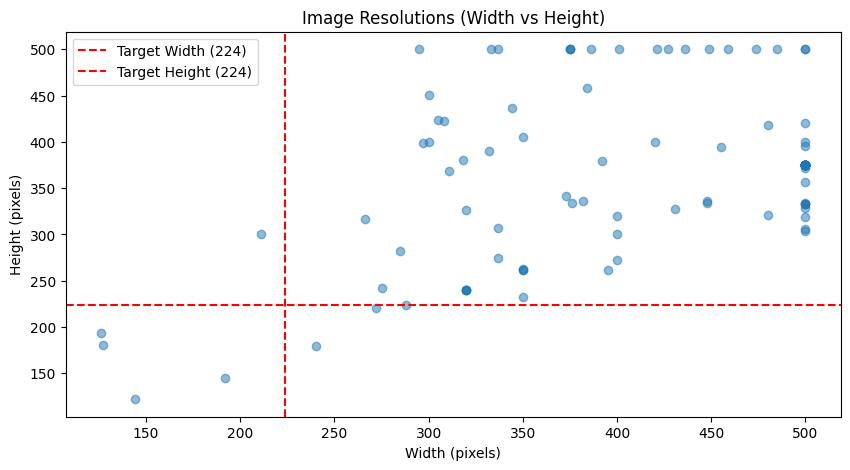

In [4]:
widths = []
heights = []

# Check first 100 images to be fast
sample_files = glob.glob(os.path.join(data_dir, '*/*.*'))[:100]
for file in sample_files:
    try:
        with Image.open(file) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
    except Exception as e:
        pass

if widths:
    plt.figure(figsize=(10, 5))
    plt.scatter(widths, heights, alpha=0.5)
    plt.title('Image Resolutions (Width vs Height)')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.axvline(224, color='r', linestyle='--', label='Target Width (224)')
    plt.axhline(224, color='r', linestyle='--', label='Target Height (224)')
    plt.legend()
    plt.show()
else:
    print("No images to analyze sizes.")